<a href="https://colab.research.google.com/github/OKJAHR/BIST100_Analizi/blob/main/BIST100_Analizi__ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import seaborn as sns


# **BIST 100 endeksindeki şirketlerin sektörel bazda genel analizi**


In [ ]:
# BIST100 şirket verilerini yükledik
BIST100=pd.read_excel('/content/temelozet.xlsx')
data=BIST100
data


,Kod,Hisse Adı,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,70.40,41684.2,2132.3,32.9,592.1
1,AGHOL,Anadolu Grubu Holding,Holdingler,99.10,24134.3,1234.6,35.8,243.5
2,AKBNK,Akbank,Bankacılık,16.81,87412.0,4471.5,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,3.00,3900.0,199.5,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,56.30,18227.1,932.4,35.3,323.8
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,9.93,15888.0,812.7,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,38.90,13049.2,667.5,39.9,335.5
97,YKBNK,Yapı Kredi Bankası,Bankacılık,10.49,88609.6,4532.8,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,22.94,10841.4,554.6,15.0,472.6


In [ ]:
# Sektörlere göre şirket sayılarını hesapladık
sektor_dict={}
sek_count = len(data['Sektör'].unique())
for sektor in data['Sektör'].unique():
  count=data[data['Sektör']==sektor].shape[0]
  #sektor_dict[sektor]=round((count/sek_count)*100,2)
  sektor_dict[sektor] = count
sektor_dict


{'Meşrubat / İçecek': 2,
 'Holdingler': 10,
 'Bankacılık': 9,
 'GYO': 6,
 'Endüstriyel Tekstil': 3,
 'Elektrik': 13,
 'Kimyasal Ürün': 2,
 'Dayanıklı Tüketim': 3,
 'Savunma': 1,
 'Otomotiv': 8,
 'Tarım Kimyasalları': 3,
 'Perakande - Ticaret': 4,
 'Çimento': 4,
 'Demir-Çelik Temel': 6,
 'Sağlık ve İlaç': 3,
 'Otomotiv Parçası': 1,
 'İnşaat- Taahhüt': 2,
 'Demir-Çelik Döküm': 2,
 'Spor': 1,
 'Gıda': 5,
 'Madencilik': 2,
 'Tekstil Entegre': 1,
 'Petrol': 2,
 'Havayolları ve Hizm.': 3,
 'Cam': 1,
 'İletişim': 2,
 'Sigorta': 1}

In [ ]:
sektor_df=pd.DataFrame(list(sektor_dict.items()), columns=['Sektör', 'Oran'])
sektor_df


,Sektör,Oran
0,Meşrubat / İçecek,2
1,Holdingler,10
2,Bankacılık,9
3,GYO,6
4,Endüstriyel Tekstil,3
5,Elektrik,13
6,Kimyasal Ürün,2
7,Dayanıklı Tüketim,3
8,Savunma,1
9,Otomotiv,8


In [ ]:
# Sektör sayılarının ortalamasını aldık
ort=sektor_df['Oran'].mean()
ort


3.7037037037037037

In [ ]:
#Sektör sayılarının ortalamsından küçük olanları belirledik
kucukler=sektor_df['Oran']<ort
sektor_df['Diğer']=kucukler


In [ ]:
#ortalamadan küçük olanları diğer olarak isimlerdirdik, ve bu değerleri topladık

total=0
for index in sektor_df[sektor_df['Diğer']==True].index:
  value = sektor_df.loc[index, 'Oran'] # Veya value=sektor_df.at[index,'Oran'] diyebilirisin.
  total=total+value
  print(f"İndex: {index}, Degeri : {value}")
print(f"DEĞERLER TOPLAMI: {total}")
sade=sektor_df[sektor_df['Oran']>ort]
sade= sade.drop('Diğer', axis=1)
diger_satiri={'Sektör': 'Diğer Sektörler','Oran':total}
sade=sade.append(diger_satiri,ignore_index=True)
sade



İndex: 0, Degeri : 2
İndex: 4, Degeri : 3
İndex: 6, Degeri : 2
İndex: 7, Degeri : 3
İndex: 8, Degeri : 1
İndex: 10, Degeri : 3
İndex: 14, Degeri : 3
İndex: 15, Degeri : 1
İndex: 16, Degeri : 2
İndex: 17, Degeri : 2
İndex: 18, Degeri : 1
İndex: 20, Degeri : 2
İndex: 21, Degeri : 1
İndex: 22, Degeri : 2
İndex: 23, Degeri : 3
İndex: 24, Degeri : 1
İndex: 25, Degeri : 2
İndex: 26, Degeri : 1
DEĞERLER TOPLAMI: 35


<ipython-input-11-5d5e2a58a024>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sade=sade.append(diger_satiri,ignore_index=True)


,Sektör,Oran
0,Holdingler,10
1,Bankacılık,9
2,GYO,6
3,Elektrik,13
4,Otomotiv,8
5,Perakande - Ticaret,4
6,Çimento,4
7,Demir-Çelik Temel,6
8,Gıda,5
9,Diğer Sektörler,35


In [ ]:
# Sektörlerin dağılımını gösteren pasta grafiğini oluşturduk
fig = px.pie(sade, values='Oran', names='Sektör',color_discrete_sequence=px.colors.sequential.Viridis, title='Bist100de sektör dağılımı')
fig.show();


In [ ]:
data_groupedbySektör = data.groupby(by="Sektör").sum()
data_groupedbySektör

<ipython-input-13-7b0bd1e19726>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
Sektör,,,,,
Bankacılık,95.98,601870.3,30788.4,269.5,52107.8
Cam,36.74,112542.5,5757.1,48.9,3063.2
Dayanıklı Tüketim,141.38,91475.8,4679.3,73.8,2611.2
Demir-Çelik Döküm,109.65,8224.0,420.7,88.2,780.0
Demir-Çelik Temel,121.94,209174.0,10700.3,239.9,9438.8
Elektrik,590.00,190586.5,9749.2,394.4,10019.0
Endüstriyel Tekstil,206.30,239556.3,12254.4,86.8,2820.9
GYO,37.27,44546.1,2278.8,252.1,8922.7
Gıda,97.20,36816.9,1883.3,150.5,2158.4


In [ ]:
df_with_index=data_groupedbySektör.reset_index()

datam=pd.DataFrame(df_with_index)
datam


,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,Bankacılık,95.98,601870.3,30788.4,269.5,52107.8
1,Cam,36.74,112542.5,5757.1,48.9,3063.2
2,Dayanıklı Tüketim,141.38,91475.8,4679.3,73.8,2611.2
3,Demir-Çelik Döküm,109.65,8224.0,420.7,88.2,780.0
4,Demir-Çelik Temel,121.94,209174.0,10700.3,239.9,9438.8
5,Elektrik,590.00,190586.5,9749.2,394.4,10019.0
6,Endüstriyel Tekstil,206.30,239556.3,12254.4,86.8,2820.9
7,GYO,37.27,44546.1,2278.8,252.1,8922.7
8,Gıda,97.20,36816.9,1883.3,150.5,2158.4
9,Havayolları ve Hizm.,618.30,242802.3,12420.4,140.4,1845.6


In [ ]:
index_list=[]
for i in datam['Sektör']:
  if i in sade['Sektör'].values:
    #print(datam[datam['Sektör'].values==i].index)
    index_list.append(datam[datam['Sektör'].values==i].index[0])


In [ ]:
çokomelli = datam.loc[index_list]
çokomelli

,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,Bankacılık,95.98,601870.3,30788.4,269.5,52107.8
4,Demir-Çelik Temel,121.94,209174.0,10700.3,239.9,9438.8
5,Elektrik,590.00,190586.5,9749.2,394.4,10019.0
7,GYO,37.27,44546.1,2278.8,252.1,8922.7
8,Gıda,97.20,36816.9,1883.3,150.5,2158.4
10,Holdingler,1254.80,424324.9,21706.1,395.2,10883.0
14,Otomotiv,2365.67,369882.3,18921.2,211.4,2247.3
16,Perakande - Ticaret,384.73,150431.0,7695.3,214.3,1582.6
24,Çimento,2554.66,64030.5,3275.5,123.2,2799.8


In [ ]:
diger_df = datam.drop(index_list,axis=0)
diger_df['Sermaye(mn TL)'].mean()

2256.061111111111

In [ ]:

new_data = pd.DataFrame(
    {'Sektör': ['Diğer'],
     'Kapanış(TL)': [0],
     'Piyasa Değeri(mn TL)':[diger_df['Piyasa Değeri(mn TL)'].mean()],
     'Piyasa Değeri(mn $)':[0],
     'Halka AçıklıkOranı (%)':[diger_df['Halka AçıklıkOranı (%)'].mean()],
     'Sermaye(mn TL)':[diger_df['Sermaye(mn TL)'].mean()]
     })


tam_df = çokomelli.append(new_data, ignore_index=True)
tam_df.drop(['Kapanış(TL)','Piyasa Değeri(mn $)'],axis=1,inplace=True)
tam_df

<ipython-input-18-dc5d0f3f782f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Sektör,Piyasa Değeri(mn TL),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,Bankacılık,601870.300000,269.500000,52107.800000
1,Demir-Çelik Temel,209174.000000,239.900000,9438.800000
2,Elektrik,190586.500000,394.400000,10019.000000
3,GYO,44546.100000,252.100000,8922.700000
4,Gıda,36816.900000,150.500000,2158.400000
5,Holdingler,424324.900000,395.200000,10883.000000
6,Otomotiv,369882.300000,211.400000,2247.300000
7,Perakande - Ticaret,150431.000000,214.300000,1582.600000
8,Çimento,64030.500000,123.200000,2799.800000
9,Diğer,89718.788889,68.405556,2256.061111


In [ ]:
import plotly.express as px

fig = px.bar(tam_df, x='Piyasa Değeri(mn TL)', y='Sektör', title="Sektörlerin Piyasa Dağılımı", orientation='h')
fig.show()


In [ ]:
# Sektörlere göre piyasa değerlerini hesapladık
deger_sektor_dict={}
for sektor in sektor_dict.keys():
  #print(sektor)
  para = 0
  for indis in data[data['Sektör'] == sektor].index:
    para += data.loc[indis]['Piyasa Değeri(mn TL)']
  deger_sektor_dict[sektor] = para

deger_sektor_dict


{'Meşrubat / İçecek': 104717.29999999999,
 'Holdingler': 424324.9,
 'Bankacılık': 601870.3,
 'GYO': 44546.1,
 'Endüstriyel Tekstil': 239556.30000000002,
 'Elektrik': 190586.49999999997,
 'Kimyasal Ürün': 12112.9,
 'Dayanıklı Tüketim': 91475.8,
 'Savunma': 88965.6,
 'Otomotiv': 369882.3,
 'Tarım Kimyasalları': 133272.7,
 'Perakande - Ticaret': 150430.99999999997,
 'Çimento': 64030.5,
 'Demir-Çelik Temel': 209174.0,
 'Sağlık ve İlaç': 46756.0,
 'Otomotiv Parçası': 12804.8,
 'İnşaat- Taahhüt': 153200.8,
 'Demir-Çelik Döküm': 8224.0,
 'Spor': 4800.5,
 'Gıda': 36816.9,
 'Madencilik': 65241.3,
 'Tekstil Entegre': 10537.2,
 'Petrol': 155223.7,
 'Havayolları ve Hizm.': 242802.3,
 'Cam': 112542.5,
 'İletişim': 121670.0,
 'Sigorta': 11034.5}

In [ ]:
piyasa_degeri_sektor_df = pd.DataFrame(list(deger_sektor_dict.items()),columns=['Sektör','Piyasa Değeri'])
piyasa_degeri_sektor_df


,Sektör,Piyasa Değeri
0,Meşrubat / İçecek,104717.3
1,Holdingler,424324.9
2,Bankacılık,601870.3
3,GYO,44546.1
4,Endüstriyel Tekstil,239556.3
5,Elektrik,190586.5
6,Kimyasal Ürün,12112.9
7,Dayanıklı Tüketim,91475.8
8,Savunma,88965.6
9,Otomotiv,369882.3


In [ ]:
ps_df = piyasa_degeri_sektor_df.sort_values(by='Piyasa Değeri', ascending=False)


In [ ]:
renk_paleti1 = ['#472d7b', '#48186a', '#472d7b', '#424086', '#3b528b', '#33638d', '#440154', '#26828e', '#21918c', '#1fa088', '#28ae80', '#3fbc73', '#5ec962', '#84d44b', '#addc30', '#d8e219', '#fde725']

# Sektörlerin piyasa değerini gösteren sütun grafiğini oluşturduk
fig = px.bar(tam_df, x='Sektör', y='Piyasa Değeri(mn TL)', title="Sektörlerin Piyasa Dağılımı")
fig.update_traces(marker_color=renk_paleti1)
fig.show()

In [ ]:
colors_dict={'Bankacılık': 2,'GYO': 3,'Elektrik': 4,'Otomotiv': 5,'Holdingler': 1,'Perakande - Ticaret': 6,'Çimento': 7,'Demir-Çelik Temel': 8,'Gıda':9}

sorted_colors_dict = dict(sorted(colors_dict.items(), key=lambda x: x[1], reverse=True))

"""renk_paleti = [
    '#FFA8A8',
    '#FFC5A4',
    '#FFDCAB', 
    '#FFEFC2',
    '#E8F7CB',
    '#CFF1D2',
    '#A4E9D7',
    '#7DD8D0',
    '#6ED9E8',
    '#6DB4FF',
    '#9EAAFF',
    '#C3A0FF',
    '#DFA6FF',
    '#FFA6D9',
    '#FFB5BB',
    '#FFC7C9',
    '#FFD9D9',
    '#FFECE7',
    '#F9EEFF',
    '#DCEBFF',
    '#C1E7FF',
    '#AADBFF',
    '#9ACBFF',
    '#8FBFFF',
    '#8FD1FF',
    '#92E4FF',
    '#92E2D8'
]
"""
renk_paleti = ['#FFE5B4', '#B5EAD7', '#F7CAC9', '#D7BDE2', '#F9DC5C', '#F5B7B1', '#8FBFFF', '#A9DFBF', '#BB8FCE', '#73C6B6']

renk_paleti2 = [ '#FFACB7', '#D7A6E6', '#FFC2A1','#D291BC', 
                '#FFE4C4', '#C7C7AF','#B1EDE8','#FF8C94', 
                '#FFEEB5',  '#9AD1D4','#FFE5B4', '#B5EAD7',
                '#F7CAC9', '#D7BDE2', '#F9DC5C', '#F5B7B1', 
                '#D2B4DE', '#A9DFBF', '#BB8FCE', '#73C6B6'
                '#F9EEFF',
    '#DCEBFF',
    '#C1E7FF',
    '#AADBFF',
    '#9ACBFF',
    '#8FBFFF',
    '#8FD1FF',
    '#92E4FF',
    '#92E2D8']

new_colors_dict = {}
for key, value in sorted_colors_dict.items():
    if isinstance(value, int) and 1 <= value <= len(renk_paleti):
        new_colors_dict[key] = renk_paleti[value - 1]
    else:
        new_colors_dict[key] = value

print(new_colors_dict)

{'Gıda': '#BB8FCE', 'Demir-Çelik Temel': '#A9DFBF', 'Çimento': '#8FBFFF', 'Perakande - Ticaret': '#F5B7B1', 'Otomotiv': '#F9DC5C', 'Elektrik': '#D7BDE2', 'GYO': '#F7CAC9', 'Bankacılık': '#B5EAD7', 'Holdingler': '#FFE5B4'}


In [ ]:
fig = px.pie(sade, values='Oran', names='Sektör', title='Sektörlerin Dağılımı', color='Sektör', color_discrete_map=new_colors_dict)
#fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.show()

fig = px.bar(tam_df, x='Piyasa Değeri(mn TL)', y='Sektör', title="Sektörlerin Piyasa Dağılımı", orientation='h',color ='Sektör', color_discrete_map=new_colors_dict)


#fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.show()

In [ ]:
# Sektörlerin Piyasa değerine göre oranlarının grafiği
Bist100 = data["Piyasa Değeri(mn TL)"].sum()
data_groupedbySektör["Toplama Etki%"] = (data_groupedbySektör["Piyasa Değeri(mn TL)"]/Bist100)*100
fig=px.line(data_groupedbySektör, y = "Toplama Etki%", hover_data={"Toplama Etki%": ":.2f"},title="Bist100 Endeksine Sektörlerin Etkisi")
fig.update_traces(line_color='#6DB4FF')

In [ ]:
bist100_ortalama_halka_aciklik_orani = data['Halka AçıklıkOranı (%)'].mean()
bist100_ortalama_halka_aciklik_orani

34.818

In [ ]:
# Sektörlere göre halka açıklık oranını hesapladık
halka_aciklik_oranları_dict={}

for sektor in sektor_dict.keys():
  #print(sektor)
  oran=0
  for indis in data[data['Sektör'] == sektor].index:
    oran += data.loc[indis]['Halka AçıklıkOranı (%)']
  oran=oran/len(data[data['Sektör']==sektor].index)
  halka_aciklik_oranları_dict[sektor]=round(oran,2)

In [ ]:
halka_aciklik_oranları_dict

{'Meşrubat / İçecek': 30.55,
 'Holdingler': 39.52,
 'Bankacılık': 29.94,
 'GYO': 42.02,
 'Endüstriyel Tekstil': 28.93,
 'Elektrik': 30.34,
 'Kimyasal Ürün': 35.9,
 'Dayanıklı Tüketim': 24.6,
 'Savunma': 25.8,
 'Otomotiv': 26.42,
 'Tarım Kimyasalları': 41.9,
 'Perakande - Ticaret': 53.58,
 'Çimento': 30.8,
 'Demir-Çelik Temel': 39.98,
 'Sağlık ve İlaç': 18.73,
 'Otomotiv Parçası': 34.7,
 'İnşaat- Taahhüt': 29.1,
 'Demir-Çelik Döküm': 44.1,
 'Spor': 32.8,
 'Gıda': 30.1,
 'Madencilik': 36.85,
 'Tekstil Entegre': 72.6,
 'Petrol': 47.25,
 'Havayolları ve Hizm.': 46.8,
 'Cam': 48.9,
 'İletişim': 33.6,
 'Sigorta': 18.9}

In [ ]:
halk_df=pd.DataFrame(list(halka_aciklik_oranları_dict.items()),columns=['Sektör','Halka Açıklık Oranı'])
halk_df



<ipython-input-71-03cba6218175>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Halka Açıklık Oranı    36.10037
dtype: float64

In [ ]:
# Sektörlerin halka açıklık oranını gösteren sütun grafiğini oluşturduk
fig = px.bar(halk_df, x='Sektör', y='Halka Açıklık Oranı',title="Sektörlerin Halka Açıklık Oranı",color_discrete_sequence=['#609EA2'])
fig.show()

In [ ]:
scaling_df = piyasa_degeri_sektor_df.copy()
from sklearn.preprocessing import MinMaxScaler
veri = scaling_df[['Piyasa Değeri']]

# Min-Max ölçekleyiciyi oluşturduk ve 0-100 aralığına ölçekledik
scaler = MinMaxScaler(feature_range=(0, 100))
scaling_df['SkalananDeger'] = scaler.fit_transform(veri)
scaling_df

,Sektör,Piyasa Değeri,SkalananDeger
0,Meşrubat / İçecek,104717.3,16.734526
1,Holdingler,424324.9,70.263879
2,Bankacılık,601870.3,100.000000
3,GYO,44546.1,6.656776
4,Endüstriyel Tekstil,239556.3,39.317983
5,Elektrik,190586.5,31.116295
6,Kimyasal Ürün,12112.9,1.224714
7,Dayanıklı Tüketim,91475.8,14.516778
8,Savunma,88965.6,14.096359
9,Otomotiv,369882.3,61.145581


In [ ]:
# Piyasa değeri ve halka açıklık oranının grafikleştirdik
fig = go.Figure()
fig.update_layout(title='Piyasa Değeri ve Halka Açıklık Oranı')
fig.add_trace(
    go.Scatter(x=piyasa_degeri_sektor_df['Sektör'], y=scaling_df['SkalananDeger'],name='Piyasa Değeri',mode='lines',marker=dict(
            color='#655DBB',
            size=5))
)

fig.add_trace(
    go.Scatter(x=halk_df['Sektör'], y=halk_df['Halka Açıklık Oranı'], name='Halka Açıklık oranı', mode='markers',marker=dict(
            color='#609EA2',
            size=8))
)

fig.show()

In [ ]:
# Korelasyonları görüntülemek için sektörü sayısal veriye çevirdik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['LE_Sektör'] = le.fit_transform(data['Sektör']) 
correlation_matrix = data[['Piyasa Değeri(mn TL)','LE_Sektör', 'Halka AçıklıkOranı (%)', 'Sermaye(mn TL)']].corr()
# Korelasyon matrisini görüntüleyin
print(correlation_matrix)

                        Piyasa Değeri(mn TL)  LE_Sektör  \
Piyasa Değeri(mn TL)                1.000000  -0.009311   
LE_Sektör                          -0.009311   1.000000   
Halka AçıklıkOranı (%)             -0.161470   0.037338   
Sermaye(mn TL)                      0.482695  -0.282799   

                        Halka AçıklıkOranı (%)  Sermaye(mn TL)  
Piyasa Değeri(mn TL)                 -0.161470        0.482695  
LE_Sektör                             0.037338       -0.282799  
Halka AçıklıkOranı (%)                1.000000       -0.169752  
Sermaye(mn TL)                       -0.169752        1.000000  


In [ ]:
data

,Kod,Hisse Adı,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL),LE_Sektör
0,AEFES,Anadolu Efes,Meşrubat / İçecek,70.40,41684.2,2132.3,32.9,592.1,13
1,AGHOL,Anadolu Grubu Holding,Holdingler,99.10,24134.3,1234.6,35.8,243.5,10
2,AKBNK,Akbank,Bankacılık,16.81,87412.0,4471.5,51.8,5200.0,0
3,AKFGY,Akfen GYO,GYO,3.00,3900.0,199.5,44.5,1300.0,7
4,AKSA,Aksa,Endüstriyel Tekstil,56.30,18227.1,932.4,35.3,323.8,6
...,...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,9.93,15888.0,812.7,19.3,1600.0,2
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,38.90,13049.2,667.5,39.9,335.5,2
97,YKBNK,Yapı Kredi Bankası,Bankacılık,10.49,88609.6,4532.8,32.0,8447.1,0
98,YYLGD,Yayla Agro Gıda,Gıda,22.94,10841.4,554.6,15.0,472.6,8


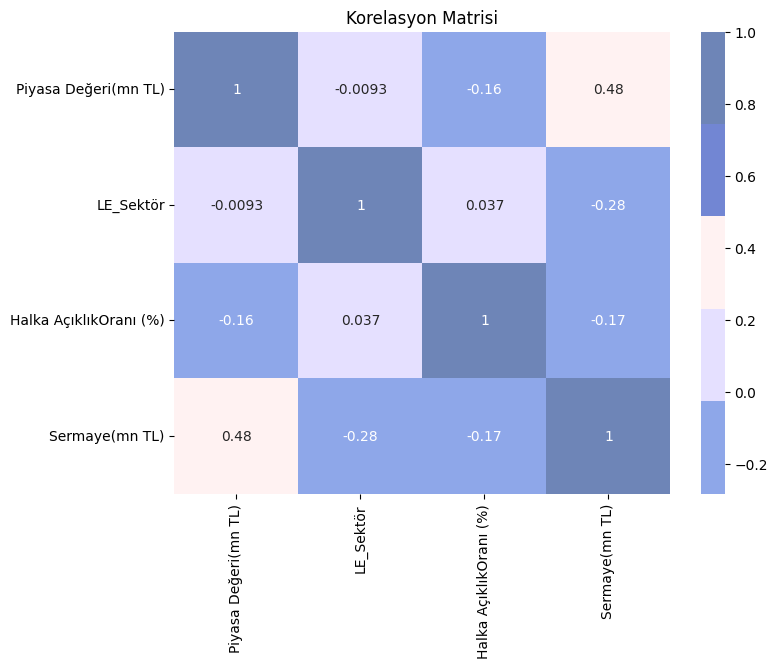

In [ ]:
# korelasyon matrisini görselleştirdik
new_renk_paleti=[ '#8EA7E9','#E5E0FF','#FFF2F2','#7286D3','#6E85B7',]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(new_renk_paleti))
plt.title('Korelasyon Matrisi')
plt.show()

In [ ]:
# sermaye bilgilerini tutan dit oluşturduk
sermaye_dict={}

for sektor in sektor_dict.keys():
  #print(sektor)
  sermaye=0
  for indis in data[data['Sektör'] == sektor].index:
    sermaye += data.loc[indis]['Sermaye(mn TL)']
  
  sermaye_dict[sektor] = sermaye 

In [ ]:
# sermaye bilgilerini df e aktardık
sermaye_df = pd.DataFrame(list(sermaye_dict.items()),columns=['Sektör','Sermaye'])

In [ ]:
# sermaye, piyasa değerini tutan df leri birleştirdik
sp_df = pd.DataFrame()
sp_df=pd.concat([sermaye_df,piyasa_degeri_sektor_df],axis=1)
sp_df

,Sektör,Sermaye,Sektör,Piyasa Değeri
0,Meşrubat / İçecek,846.5,Meşrubat / İçecek,104717.3
1,Holdingler,10883.0,Holdingler,424324.9
2,Bankacılık,52107.8,Bankacılık,601870.3
3,GYO,8922.7,GYO,44546.1
4,Endüstriyel Tekstil,2820.9,Endüstriyel Tekstil,239556.3
5,Elektrik,10019.0,Elektrik,190586.5
6,Kimyasal Ürün,271.6,Kimyasal Ürün,12112.9
7,Dayanıklı Tüketim,2611.2,Dayanıklı Tüketim,91475.8
8,Savunma,2280.0,Savunma,88965.6
9,Otomotiv,2247.3,Otomotiv,369882.3


In [ ]:
# sermaye ve piyasa değerini 0 ile 100 arasına ölçeklendirdik
scaling_sp_df = sp_df.copy()
from sklearn.preprocessing import MinMaxScaler
veri = scaling_sp_df[['Piyasa Değeri']]
scaler = MinMaxScaler(feature_range=(0, 100))
scaling_sp_df['SC_Piyasa'] = scaler.fit_transform(veri)
veri = scaling_sp_df[['Sermaye']]
scaler = MinMaxScaler(feature_range=(0, 100))
scaling_sp_df['SC_Sermaye'] = scaler.fit_transform(veri)

In [ ]:
scaling_sp_df

,Sektör,Sermaye,Sektör,Piyasa Değeri,SC_Piyasa,SC_Sermaye
0,Meşrubat / İçecek,846.5,Meşrubat / İçecek,104717.3,16.734526,1.618475
1,Holdingler,10883.0,Holdingler,424324.9,70.263879,20.880690
2,Bankacılık,52107.8,Bankacılık,601870.3,100.000000,100.000000
3,GYO,8922.7,GYO,44546.1,6.656776,17.118450
4,Endüstriyel Tekstil,2820.9,Endüstriyel Tekstil,239556.3,39.317983,5.407776
5,Elektrik,10019.0,Elektrik,190586.5,31.116295,19.222487
6,Kimyasal Ürün,271.6,Kimyasal Ürün,12112.9,1.224714,0.515118
7,Dayanıklı Tüketim,2611.2,Dayanıklı Tüketim,91475.8,14.516778,5.005316
8,Savunma,2280.0,Savunma,88965.6,14.096359,4.369672
9,Otomotiv,2247.3,Otomotiv,369882.3,61.145581,4.306913


1**grafik**

In [ ]:
fig = go.Figure()
fig.update_layout(title='Piyasa Değeri ve Sermaye Oranı')
fig.add_trace(
    go.Scatter(x=sermaye_df['Sektör'], y=scaling_sp_df['SC_Sermaye'], name='Sermaye', mode='lines',marker=dict(
            color='#65647C',
            size=5)
             ))
fig.add_trace(
    go.Scatter(x=sermaye_df['Sektör'], y=scaling_sp_df['SC_Piyasa'], name='Piyasa Değeri', mode='lines',marker=dict(
            color='#E384FF',
            size=5))
)
fig.show()

In [ ]:
fig = go.Figure()
fig.update_layout(title='Piyasa Değeri, Sermaye ve Halka Açıklık Oranı ')
fig.add_trace(
    go.Scatter(x=sermaye_df['Sektör'], y=scaling_sp_df['SC_Sermaye'], name='Sermaye', mode='lines',marker=dict(
            color='#65647C',
            size=5))
)
fig.add_trace(
    go.Scatter(x=sermaye_df['Sektör'], y=scaling_sp_df['SC_Piyasa'], name='Piyasa Değeri', mode='lines',marker=dict(
            color='#E384FF',
            size=5))
)
fig.add_trace(
    go.Scatter(x=halk_df['Sektör'], y=halk_df['Halka Açıklık Oranı'], name='Halka Açıklık Oranı', mode='markers',marker=dict(
            color='#609EA2',
            size=8))
)
 

fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(title='Piyasa Değeri, Sermaye ve Halka Açıklık Oranı')

fig.add_trace(go.Scatter(x=sermaye_df['Sektör'], y=scaling_sp_df['SC_Sermaye'], name='Sermaye', mode='lines', marker=dict(
    color='#65647C',
    size=5
)))

fig.add_trace(go.Scatter(x=sermaye_df['Sektör'], y=scaling_sp_df['SC_Piyasa'], name='Piyasa Değeri', mode='lines', marker=dict(
    color='#E384FF',
    size=5
)))

fig.add_trace(go.Scatter(x=halk_df['Sektör'], y=halk_df['Halka Açıklık Oranı'], name='Halka Açıklık Oranı', mode='markers', marker=dict(
    color='#609EA2',
    size=halk_df['Halka Açıklık Oranı'],
    sizemode='area',
    sizeref=2 * max(halk_df['Halka Açıklık Oranı']) / (30 ** 2),  # Nokta büyüklüğünü ayarlamak için referans değer
    sizemin=7
)))

fig.show()


In [ ]:
#Sektördeki Lider Şirketleri Bulduk
s,l,p = [],[],[]
for sektor in sektor_dict.keys():
  lider_hisse_index = data[data['Sektör'] == sektor]['Piyasa Değeri(mn TL)'].sort_values(ascending=False).index[0]


  s.append(sektor)
  l.append(data.loc[lider_hisse_index]['Hisse Adı'])
  p.append(data.loc[lider_hisse_index]['Piyasa Değeri(mn TL)'])
liderler = {
    'Sektör':s,
    'Lider':l,
    'Piyasa Değeri':p
}


In [ ]:
lider_df = pd.DataFrame(liderler)

In [ ]:
lider_df = lider_df.sort_values(by='Piyasa Değeri',ascending=False)
lider_df

,Sektör,Lider,Piyasa Değeri
1,Holdingler,Koç Holding,222778.6
4,Endüstriyel Tekstil,Sasa Polyester Sanayi A.Ş.,209881.2
9,Otomotiv,Ford Otosan,183561.0
23,Havayolları ve Hizm.,Türk Hava Yolları,174984.0
16,İnşaat- Taahhüt,Enka İnşaat,143640.0
2,Bankacılık,İş Bankası (C),128199.6
22,Petrol,Tüpraş,125241.7
24,Cam,Şişecam,112542.5
13,Demir-Çelik Temel,Ereğli Demir Çelik,102970.0
11,Perakande - Ticaret,Bim Birleşik Mağazalar A.Ş,96301.9


In [ ]:
#Sektörlerin Lider Şirketlerini görselleştirdik
#fig = px.bar(lider_df, x='Lider', y='Piyasa Değeri',title="Sektörlerin Lider Şirketleri",color_discrete_sequence=['#8D9EFF'])
#fig.show()

In [ ]:
fig = px.scatter(lider_df, x='Lider', y='Piyasa Değeri', title="Sektörlerin Lider Şirketleri",
                 color='Sektör', size='Piyasa Değeri', hover_data=['Sektör', 'Piyasa Değeri'],
                 color_discrete_map=new_colors_dict)
fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(lider_df, x='Lider', y='Piyasa Değeri', title="Sektörlerin Lider Şirketleri",
                 color='Sektör', size='Piyasa Değeri', hover_data=['Sektör', 'Piyasa Değeri'],
                 color_discrete_map=new_colors_dict)

# Verileri Piyasa Değeri'ne göre sırala
lider_df_sorted = lider_df.sort_values('Piyasa Değeri', ascending=False)

fig = px.scatter(lider_df_sorted, x='Lider', y='Piyasa Değeri', title="Sektörlerin Lider Şirketleri",
                 color='Sektör', size='Piyasa Değeri', hover_data=['Sektör', 'Piyasa Değeri'],
                 color_discrete_map=new_colors_dict)

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [ ]:
import plotly.express as px
renk_paleti2 = [ '#FFACB7', '#D7A6E6', '#FFC2A1','#D291BC',
                '#DCEBFF', '#C1E7FF','#AADBFF', '#9ACBFF',
                '#8FBFFF', '#8FD1FF','#92E2D8', '#FFE4C4',
                '#B1EDE8','#FFEEB5', '#9AD1D4','#FFE5B4', 
                '#B5EAD7','#F7CAC9', '#D7BDE2', '#F9DC5C',
                '#F5B7B1',  '#D2B4DE', '#A9DFBF', '#BB8FCE', 
                '#73C6B6','#F9EEFF','#FF8C94', '#C7C7AF']
# Verileri Piyasa Değeri'ne göre sırala
lider_df_sorted = lider_df.sort_values('Piyasa Değeri', ascending=False)

fig = px.bar(lider_df_sorted, x='Lider', y='Piyasa Değeri', title="Sektörlerin Lider Şirketleri",)

fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.update_traces(marker=dict(color='#8FBFFF'))
fig.show()


In [ ]:
import plotly.express as px

# 'Piyasa Değeri' sütununa göre DataFrame'i sıralayın
lider_df_sorted = lider_df.sort_values('Piyasa Değeri', ascending=False)

# Plotly Express kullanarak hareketli yatay çubuk grafik oluşturun
fig = px.bar(lider_df_sorted, y='Sektör', x='Piyasa Değeri', color='Lider', animation_frame='Sektör',
             orientation='h', title="Sektörlerin Lider Şirketleri")

# Grafik ayarları yapın
fig.update_traces(marker=dict(line=dict(color='black', width=2)))

# Grafik göster
fig.show()